In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
new_df = pd.read_csv('extended_df.csv')
new_df.head()

,sub_mono,cover,sub_doble,sub_doble_intermitente,directo_cantar,trend,encoded_color,encoded_light,likes,views,comments,saved,compartidos
0,1,1,0,0,1,1,0,2,67098.745306,1.000001e+06,147.015263,2249.157314,-0.561948
1,1,0,0,0,0,0,0,2,8661.726440,2.031999e+05,35.231510,837.273688,48.682542
2,1,1,0,1,0,1,0,2,110000.096025,1.988001e+05,684.214792,25100.801475,241.612920
3,0,1,0,0,0,0,0,0,2655.919284,7.461004e+05,1522.151234,837.317012,68.288096
4,1,0,0,0,1,1,1,2,151999.959597,2.649898e+04,66.035842,41200.087240,541.152423


## Functions used 

In [6]:
def calculate_std_counts(binary_column, numerical_column):
    within_std_left_1 = 0
    within_std_right_1 = 0
    within_2std_right_1 = 0
    beyond_2std_right_1 = 0

    within_std_left_0 = 0
    within_std_right_0 = 0
    within_2std_right_0 = 0
    beyond_2std_right_0 = 0

    mean = numerical_column.mean()
    std = numerical_column.std()

    for idx, value in enumerate(binary_column):
        if value == 1 and 0 <= numerical_column[idx] < mean:
            within_std_left_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_1 += 1
        elif value == 1 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_1 += 1
        elif value == 1 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_1 += 1
        elif value == 0 and 0 <= numerical_column[idx] < mean:
            within_std_left_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + std):
            within_std_right_0 += 1
        elif value == 0 and mean <= numerical_column[idx] < (mean + 2 * std):
            within_2std_right_0 += 1
        elif value == 0 and numerical_column[idx] > (mean + 2 * std):
            beyond_2std_right_0 += 1
        counts = within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1

    return counts

In [7]:
def plot_std_counts(binary_column, numerical_column, title='', xlabel='', ylabel=''):
    within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1 = calculate_std_counts(binary_column, numerical_column)
    categories = ['No&Left Std', 'No&Right Std', 'No&2Right Std', 'No&2+Right Std', 'Yes&Left Std', 'Yes&Right Std', 'Yes&2Right Std', 'Yes&2+Right Std']
    counts = [within_std_left_0, within_std_right_0, within_2std_right_0, beyond_2std_right_0, within_std_left_1, within_std_right_1, within_2std_right_1, beyond_2std_right_1]
    colors = ['red', 'red', 'red', 'red', 'skyblue', 'skyblue', 'skyblue', 'skyblue']

    plt.figure(figsize=(12, 4))  # Adjusted size to be smaller
    bars= plt.bar(categories, counts, color=colors[:4] + colors[4:])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count,
                 ha='center', va='bottom')
    plt.show()

## **Data analysis without data augmentation or imputation** 


In [8]:
target_description = new_df.describe()

In [9]:
target_description.drop(['sub_mono','cover','sub_doble','sub_doble_intermitente', 'trend','directo_cantar','encoded_color','encoded_light'], axis='columns')

,likes,views,comments,saved,compartidos
count,2900.000000,2.900000e+03,2900.000000,2900.000000,2900.000000
mean,73851.546911,4.828843e+05,408.501691,12336.627093,2478.200267
std,110858.113736,6.748771e+05,482.202229,20883.097636,4116.413947
min,143.413193,2.674656e+03,1.756866,16.029326,-2.538439
25%,5926.677057,5.809910e+04,65.445795,723.978748,53.578648
50%,29699.375554,2.031991e+05,188.678897,2822.984042,457.686359
75%,126700.648368,7.769997e+05,651.036217,18501.262615,2048.990970
max,556903.008924,3.400002e+06,1587.578867,98002.658680,14502.892687


### **Visualization of the binary variables count that fall within x std of the shares distribution**

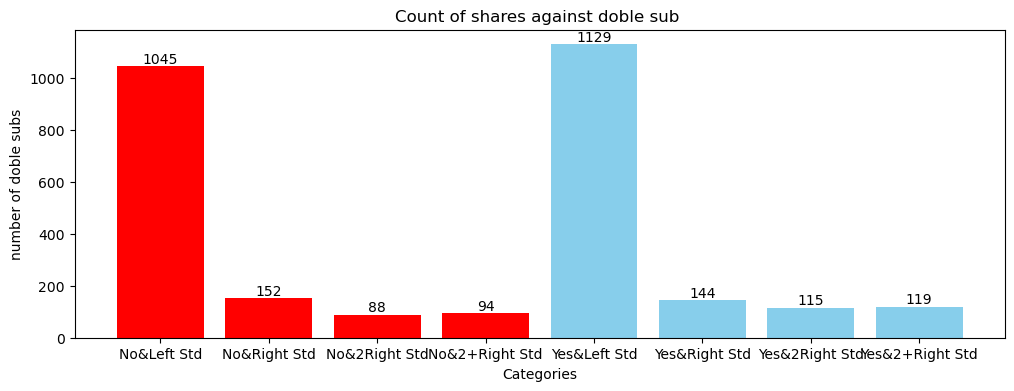

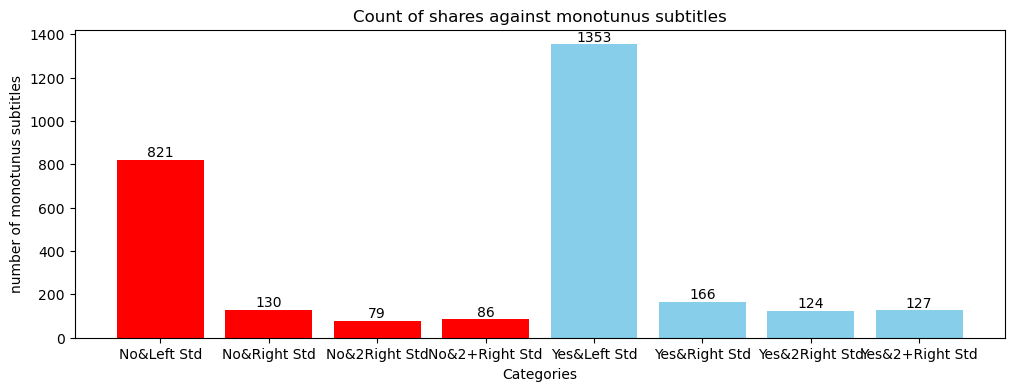

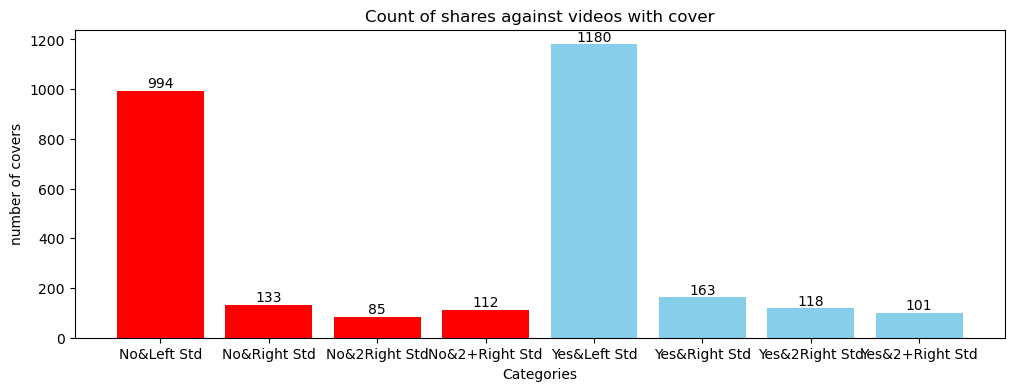

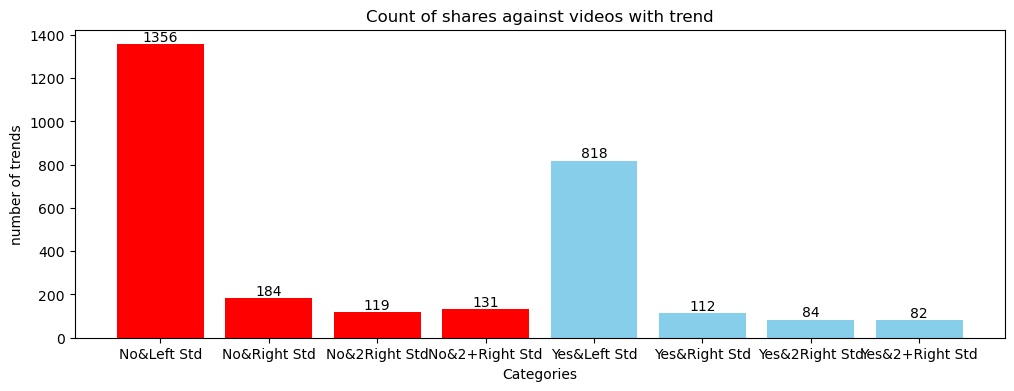

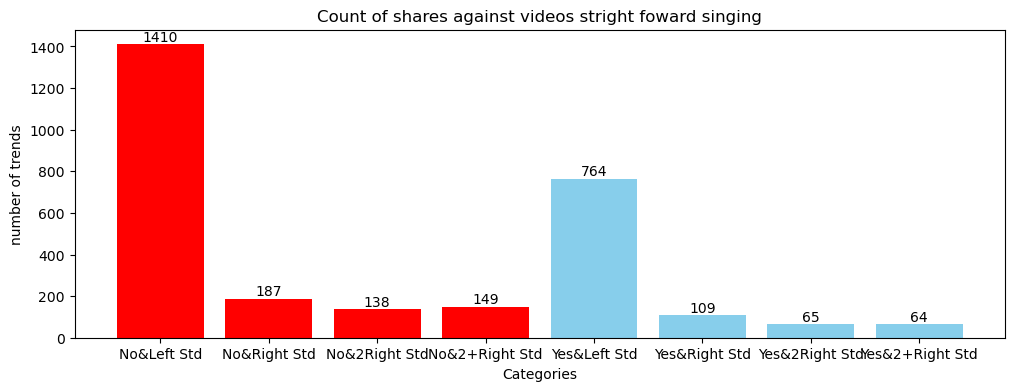

In [10]:
plot_std_counts(new_df['sub_doble'], new_df['compartidos'], title='Count of shares against doble sub ', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['compartidos'], title='Count of shares against monotunus subtitles', xlabel='Categories', ylabel='number of monotunus subtitles')
plot_std_counts(new_df['cover'], new_df['compartidos'], title='Count of shares against videos with cover', xlabel='Categories', ylabel='number of covers')
plot_std_counts(new_df['trend'], new_df['compartidos'], title='Count of shares against videos with trend', xlabel='Categories', ylabel='number of trends')
plot_std_counts(new_df['directo_cantar'], new_df['compartidos'], title='Count of shares against videos stright foward singing', xlabel='Categories', ylabel='number of trends')

Regarding the doble subtitle parameter, the bar plot of both escenarios appear to be very similar, ergo this doesn't seem to influence the amount of shares. Regarding the use of monotnus subtitles, is can be apreciated that using non-monotonus subs reduces the count of people that fall to the left side of the distribution.The use of a cover slightly improves the amount of people falling to the right side, and when a trend is used, we can see a reduction on the people that fall to the left side.  
**Therefore I conclude that the elements that influnce positivly the amount of shares are the use of non-mono-subs and the use of trends. Covers do have a influnce, but it should be less weighted.**

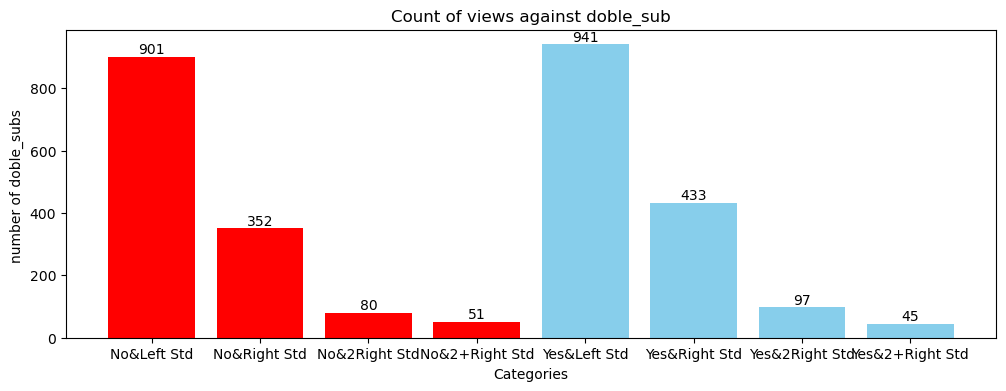

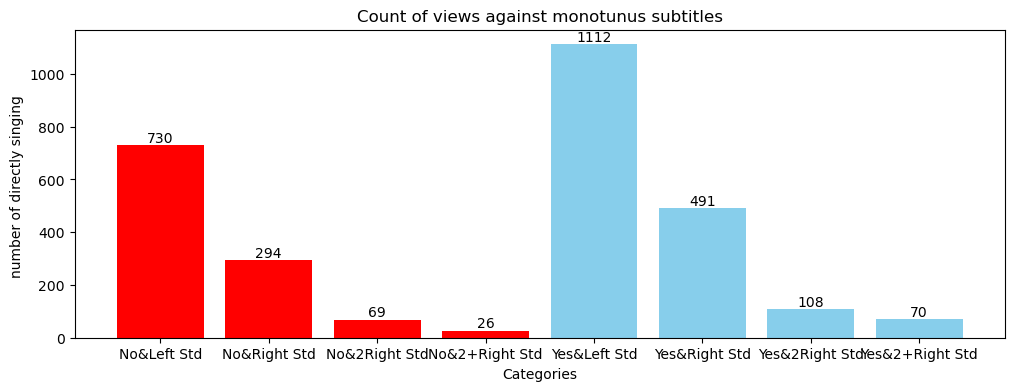

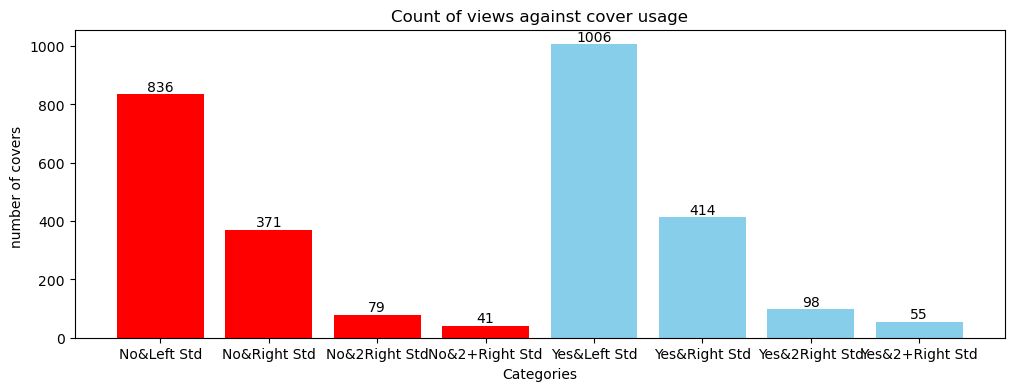

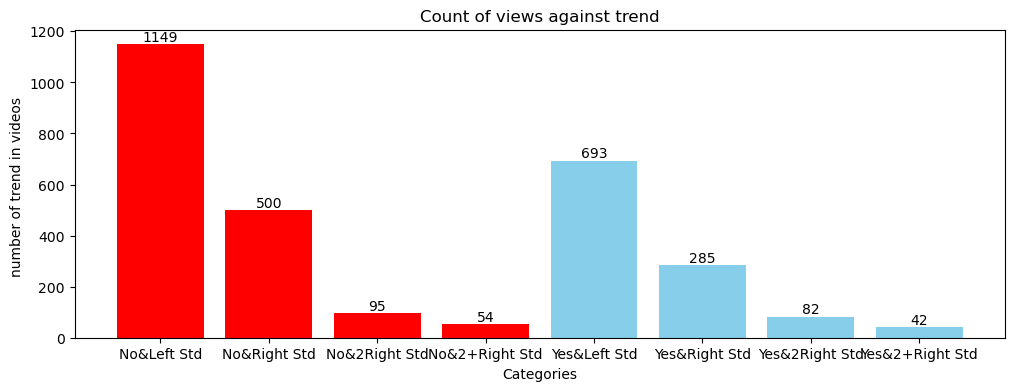

In [11]:
plot_std_counts(new_df['sub_doble'], new_df['views'], title='Count of views against doble_sub', xlabel='Categories', ylabel='number of doble_subs ')
plot_std_counts(new_df['sub_mono'], new_df['views'], title='Count of views against monotunus subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['views'], title='Count of views against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['views'], title='Count of views against trend', xlabel='Categories', ylabel='number of trend in videos ')

Regarding the doble subtitle parameter, the bar plot of both escenarios appear to be very similar, ergo this doesn't seem to influence the amount of views. Regarding the use of monotnus subtitles, is can be apreciated that using non-monotonus subs reduces the count of people that fall to the left side of the distribution.The use of a cover slightly improves every aspect of the bar plot. Finally, the use of a trend clearly reduces the people that fall into the left side of the distribution.

**Therefore I conclude that the elements that influnce positivly the amount of viwes are the use of non-mono-subs and the use of trends. Covers do have a influnce, but it should be less weighted.**

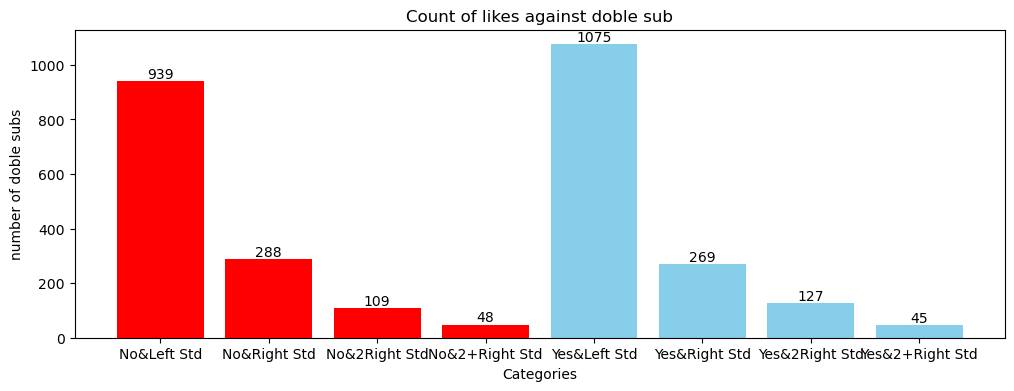

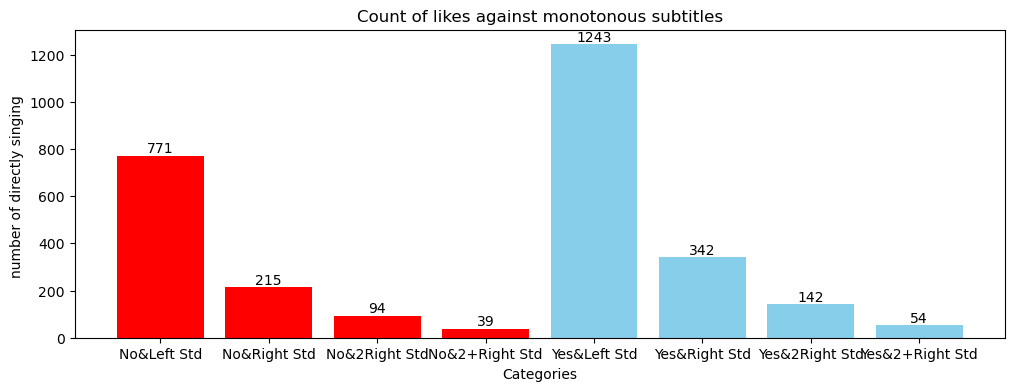

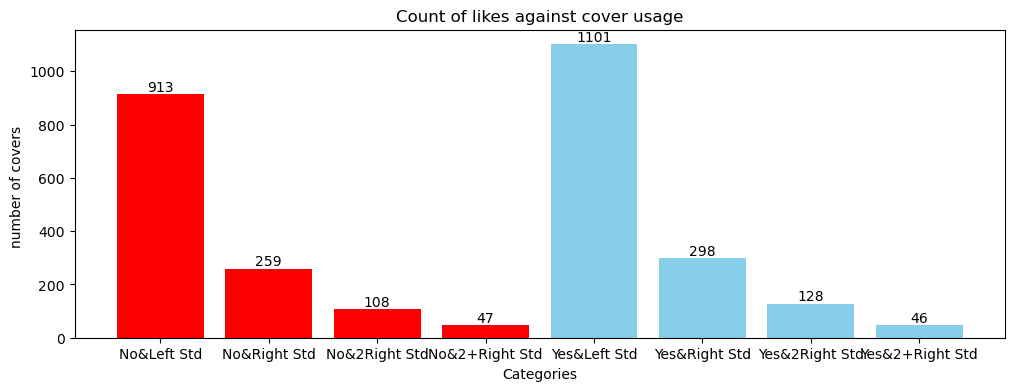

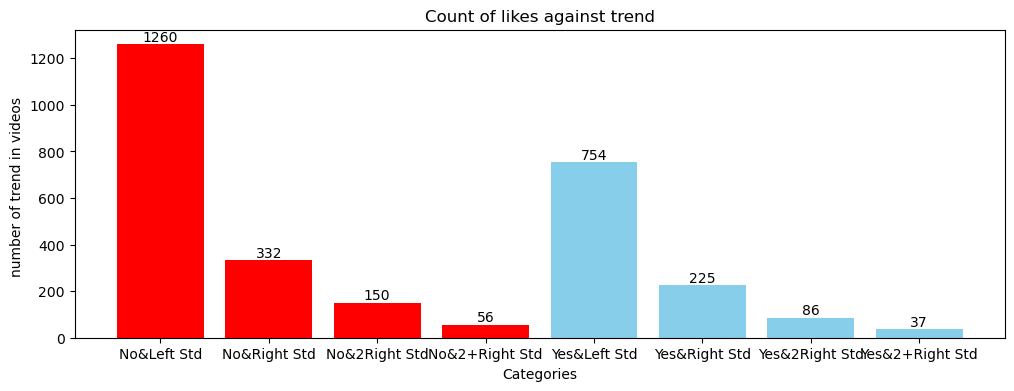

In [12]:
plot_std_counts(new_df['sub_doble'], new_df['likes'], title='Count of likes against doble sub', xlabel='Categories', ylabel='number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['likes'], title='Count of likes against monotonous subtitles', xlabel='Categories', ylabel='number of directly singing ')
plot_std_counts(new_df['cover'], new_df['likes'], title='Count of likes against cover usage', xlabel='Categories', ylabel='number of covers ')
plot_std_counts(new_df['trend'], new_df['likes'], title='Count of likes against trend', xlabel='Categories', ylabel='number of trend in videos ')

Regarding the doble subtitle parameter, the bar plot of both escenarios appear to be very similar, ergo this doesn't seem to influence the amount of likes. Regarding the use of monotnus subtitles, is can be apreciated that using non-monotonus subs reduces the count of people that fall to the left side of the distribution.The use of a cover slightly improves every aspect of the bar plot. Finally, the use of a trend clearly reduces the people that fall into the left side of the distribution.

**Therefore I conclude that the elements that influnce positivly the amount of viwes are the use of non-mono-subs and the use of trends. Covers do have a influnce, but it should be less weighted.**

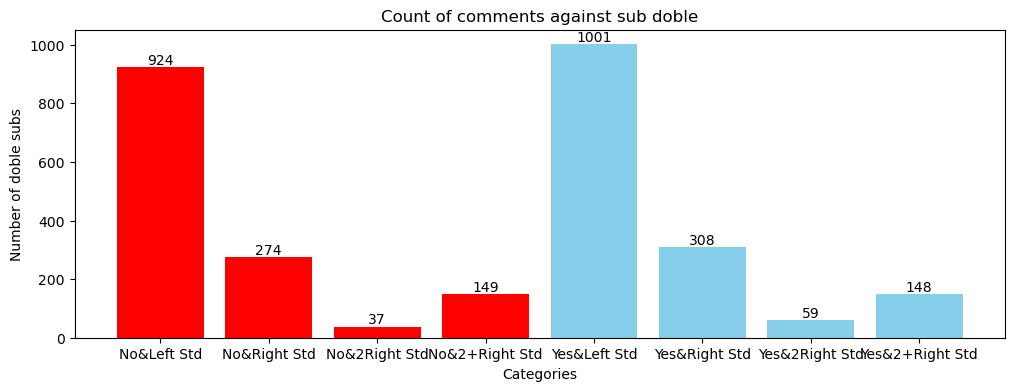

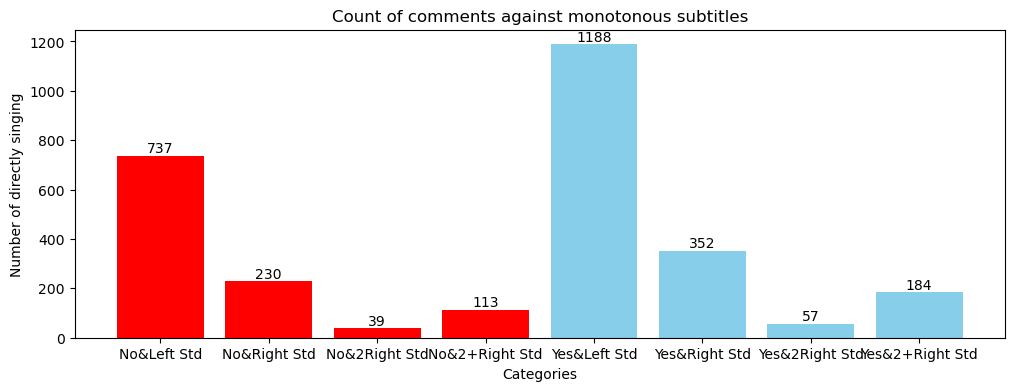

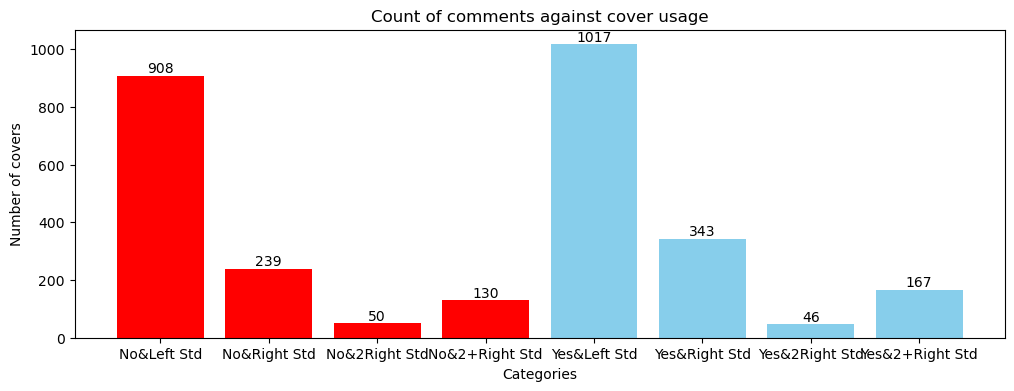

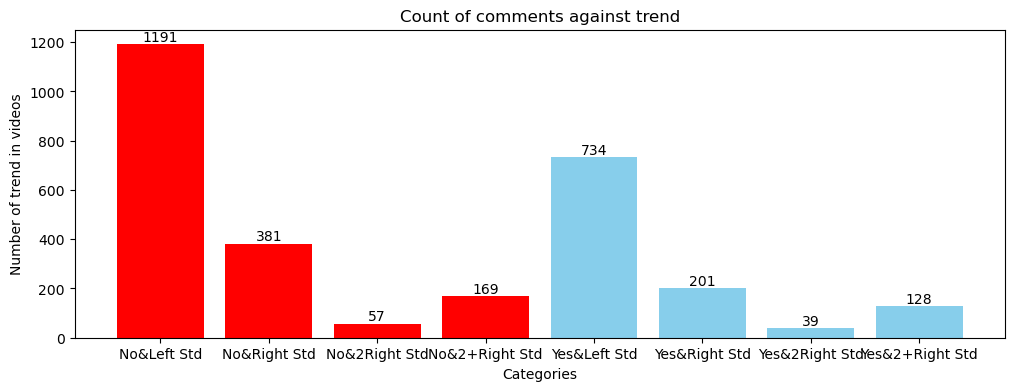

In [13]:
plot_std_counts(new_df['sub_doble'], new_df['comments'], title='Count of comments against sub doble', xlabel='Categories', ylabel='Number of doble subs')
plot_std_counts(new_df['sub_mono'], new_df['comments'], title='Count of comments against monotonous subtitles', xlabel='Categories', ylabel='Number of directly singing')
plot_std_counts(new_df['cover'], new_df['comments'], title='Count of comments against cover usage', xlabel='Categories', ylabel='Number of covers')
plot_std_counts(new_df['trend'], new_df['comments'], title='Count of comments against trend', xlabel='Categories', ylabel='Number of trend in videos')

Regarding the doble subtitle parameter, the bar plot of both escenarios appear to be very similar, ergo this doesn't seem to influence the amount of saves. Regarding the use of monotnus subtitles, is can be apreciated that using non-monotonus subs reduces the count of people that fall to the left side of the distribution.The use of a cover  improves every aspect of the bar plot. Finally, the use of a trend clearly reduces the people that fall into the left side of the distribution.

**Therefore I conclude that the elements that influnce positivly the amount of viwes are the use of non-mono-subs and the use of trends. Covers have an influence, but less weighted**

In [27]:
#import seaborn as sns
#import pandas as pd

#columns_of_interest = ['likes', 'trend', 'cover', 'sub_mono']
#data_of_interest = new_df[columns_of_interest]

#sns.pairplot(data_of_interest)
#plt.show()


In [28]:
def count_df(binary_column, numerical_column):
    count_values = calculate_std_counts(binary_column, numerical_column)
    columns = ['within_std_left_0', 'within_std_right_0', 'within_2std_right_0', 'beyond_2std_right_0', 'within_std_left_1', 'within_std_right_1', 'within_2std_right_1', 'beyond_2std_right_1']
    df = pd.DataFrame([count_values], columns=columns)
    return df

In [33]:
count_likes_sub_doble = count_df(new_df['sub_doble'], new_df['likes'])
count_likes_sub_mono = count_df(new_df['sub_mono'], new_df['likes'])

In [34]:
count_likes_sub_doble

,within_std_left_0,within_std_right_0,within_2std_right_0,beyond_2std_right_0,within_std_left_1,within_std_right_1,within_2std_right_1,beyond_2std_right_1
0,939,288,109,48,1075,269,127,45


In [35]:
count_likes_sub_mono

,within_std_left_0,within_std_right_0,within_2std_right_0,beyond_2std_right_0,within_std_left_1,within_std_right_1,within_2std_right_1,beyond_2std_right_1
0,771,215,94,39,1243,342,142,54


In [37]:
count_likes_sub_mono.to_csv('likes_sub_mono.csv', index=False)